## Building an Image Classifier


In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.10.0'

In [4]:
tf.__version__

'2.10.0'

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 imagaes. 

__Usage:
from keras datasets import fashion_mnist
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns 2 tuples:
    1. x_train, x_test: unit8 array of grayscale image data with shape (num_samples, 28, 28)
    2. y_train, y_test: unit8 array of lables (integers in range 0-9)with shape (num_samples.)

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
plt.imshow(x_train_full[1])   #There are 10 items which represents no. from 0 to 9 for each item. So according to this example the item present in dataset at 0 location is the item which represents the 8 number.

In [7]:
y_train_full[1]

0

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",  "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train_full[1]]

'T-shirt/top'

In [10]:
x_train_full[10]       #It represents the pixel values of image present at 10th index of x_train_full with 28 rows and 28 columns

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

## Data Normalization
* For running gradient descent model we need to normalize the data first between 0 and 1
* We then normalizing the data dimensions so that they are of approximately the same scale.
* For normalizing data we divide all the values by max value present in data
* As we know in given dataset the values are present in the scale of 0 to 255. so we can directly dividing it by max value i.e. 255
* But for general databases we don't know about absolute scale so we generally subtract the mean from these no.s and divided by their standard deviations.

In [11]:
x_train_n = x_train_full / 255.
x_test_n = x_test / 255.

## Split the data into train/validation/test datasets
In the earlier step of importing the data. We had 60,000 datasets for training and 10,000 test datasets. Now we know further split the trianing data into train/validation. Here is how each type of dataset is used in deep learning.

    * Training data : Used for training the model.
    * Validation data: Used for tuning the hyperparameters and evaluate the models.
    * Test data: Used to test the model after the model has gone through initial vetting by the validation set.

In [12]:
x_valid, x_train = x_train_n[: 5000], x_train_n[5000: ]
y_valid, y_train = y_train_full[: 5000], y_train_full[5000: ]
x_test = x_test_n

In [13]:
x_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Create the model architecture 
There are two API's for defining a model in keras.

    * Sequential model API:
        used for straight forward networks like inputs are taken layer by layer. It means first layers output will be input for third layer not 4th or 5th layer.
    
    * Functional API:
        used for complex networks like if we need the connect the input layer with something another hidden layer or any layer This model has this functionality. as it is more complex than sequential model api but it is flexible.

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

* Input layer is 28x28 pixels we want out put as 10 categories.
* as this is classification model so for hidden layers we are using ReLu Activation function and for Output layer Softmax Activation function.

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

*.add used for add the layer.
* Flatten is used for convert the 2D array into 1D array.
* .Dense is used for no. of neurons we want to make the layer with.
* In classification model we use relu activation function for hidden layers and for output layer sofftmax activation function.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


* In output shape we have not specified the class size so it has taken complete(  , 784), and neurons present in respective layers(  , 784.
* param is the no. of variables that need to optimize. It is calculated like for dens_1 nerons are 100 and for above layer 300 so multiplying them and adding neurons no. equals 100 i.e present in dense_1 layer we get 30100.

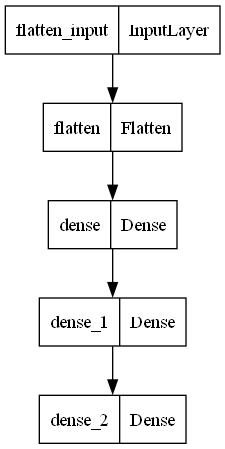

In [17]:
import pydot
keras.utils.plot_model(model)

* We can access the parameters using get_weight() method

In [18]:
weights, biases = model.layers[1].get_weights()

In [19]:
weights

array([[-0.04060876,  0.02204017,  0.03948879, ..., -0.00728128,
         0.06567287,  0.02502991],
       [-0.00882311,  0.06943713, -0.01443269, ...,  0.02050226,
         0.07276492,  0.02726627],
       [-0.00086132,  0.04828868,  0.06842268, ..., -0.07043416,
        -0.02511075, -0.00369278],
       ...,
       [-0.06458724, -0.04429334, -0.01946593, ...,  0.05366407,
         0.01947147, -0.03320054],
       [ 0.05797464, -0.05787864,  0.02468032, ..., -0.04274096,
         0.04704432,  0.04586058],
       [-0.01908545,  0.043661  ,  0.02798118, ...,  0.01958091,
        -0.0652882 , -0.00953793]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

* Before training our model we need to setup the learning processes and to do that we will use the compile method.
* In our data we have 10 different labels so we are using sparse_categorical_crossentropy.
* If instead we have probability per class in our y variable then we have to use categorical_crossentropy.
* If we had binary labels such as yes or no , true or false in this case we have to use binary_crossentropy.
* optimizer set to "sgd" it means stocastic gradient descent. in other words we are telling to keras to perform backpropogation algorithm.
* As we are using classifier so metrix set to accuracy, if it is regression then it will be mean square error.
* https://keras.io/api/models/sequential/

In [23]:
#Compiling our model
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [24]:
model_history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7251 - accuracy: 0.7597 - val_loss: 0.5260 - val_accuracy: 0.8164
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4887 - accuracy: 0.8287 - val_loss: 0.4379 - val_accuracy: 0.8500
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4429 - accuracy: 0.8433 - val_loss: 0.5395 - val_accuracy: 0.8000
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4161 - accuracy: 0.8543 - val_loss: 0.3977 - val_accuracy: 0.8630
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3973 - accuracy: 0.8604 - val_loss: 0.3807 - val_accuracy: 0.8660
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3794 - accuracy: 0.8664 - val_loss: 0.3721 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3670 - accuracy: 0.8703 - val_loss: 0.3680 - val_ac

In [25]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}